In [1]:
import pandas as pd

df = pd.read_csv("llm_vs_indra_per_evidence.tsv", sep="\t")
df.head()              # peek

,Index,Evidence,LLM_statement,INDRA_statement,subject_match,object_match,relation_match,subject_namespace_match,object_namespace_match,similarity
0,1,"Recently, metformin, the most widely used firs...","a(CHEBI:metformin) hasComponent a(CHEBI:N,N-di...",NaN,False,False,False,False,False,bad
1,11,Kinases DYRK1A and DYRK3 have been shown to ph...,"act(p(HGNC:DYRK1A), ma(GO:""kinase activity"")) ...",NaN,False,False,False,False,False,bad
2,11,Kinases DYRK1A and DYRK3 have been shown to ph...,"act(p(HGNC:DYRK3), ma(GO:""kinase activity"")) d...",NaN,False,False,False,False,False,bad
3,11,"Sumoylation at K734 by SUMO1 increases, wherea...","act(p(HGNC:SUMO1), ma(GO:""SUMO transferase act...",NaN,False,False,False,False,False,bad
4,11,"Sumoylation at K734 by SUMO1 increases, wherea...","act(p(HGNC:SENP1), ma(GO:""protein desumoylatio...",NaN,False,False,False,False,False,bad


In [2]:
criteria = [
    'subject_match',
    'object_match',
    'relation_match',
    'subject_namespace_match',
    'object_namespace_match'
]

summary = df[criteria].sum().to_frame('count')
summary['percent'] = (summary['count'] / len(df)) * 100
summary

,count,percent
subject_match,50,62.50
object_match,40,50.00
relation_match,41,51.25
subject_namespace_match,78,97.50
object_namespace_match,53,66.25


In [ ]:
# rows where names match but relation disagrees
disagree = df[(df.subject_match | df.object_match) & (~df.relation_match)]
disagree[["LLM_statement","INDRA_statement"]].head()


,LLM_statement,INDRA_statement
4,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) increases p(HGNC:5224 ! HSF1)
10,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) increases p(HGNC:5224 ! HSF1)
15,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) increases p(HGNC:5224 ! HSF1)
20,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) increases p(HGNC:5224 ! HSF1)
23,act(p(HGNC:AKT1)) directlyIncreases act(p(HGNC...,p(HGNC:5224 ! HSF1) hasVariant p(HGNC:5224 ! H...


In [17]:
# Calculate rows where subject, object, and relation all match
full_match = df['subject_match'] & df['object_match'] & df['relation_match']
full_match_count = full_match.sum()
full_match_percent = (full_match_count / len(df)) * 100
print(f"Full match count: {full_match_count}")
print(f"Full match percent: {full_match_percent:.2f}%")
df[full_match]

Full match count: 20
Full match percent: 25.00%


,Paragraph,LLM_statement,INDRA_statement,subject_match,object_match,relation_match,subject_namespace_match,object_namespace_match
1,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
5,3,"act(p(HGNC:AKT2), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,True,True,True,True,True
6,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
8,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
9,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
11,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
13,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
14,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,False
16,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
18,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True


In [15]:
# Find rows where all 5 criteria are True
all_true = df[criteria].all(axis=1)
print(f"Number of rows where all criteria are True: {len(df[all_true])}")
print(f"Percentage of rows where all criteria are True: {(len(df[all_true]) / len(df)) * 100:.2f}%")
df[all_true]

Number of rows where all criteria are True: 16
Percentage of rows where all criteria are True: 20.00%


,Paragraph,LLM_statement,INDRA_statement,subject_match,object_match,relation_match,subject_namespace_match,object_namespace_match
1,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
5,3,"act(p(HGNC:AKT2), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,True,True,True,True,True
6,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
8,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
9,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
11,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
13,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
16,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
18,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True
19,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,True,True,True,True


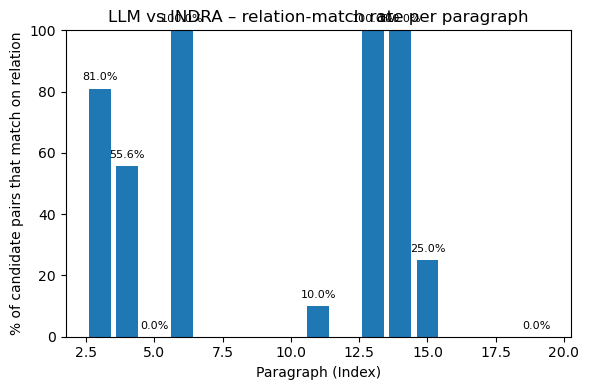

,total_pairs,relation_matches,pct
Paragraph,,,
3,21,17,81.0
4,9,5,55.6
5,1,0,0.0
6,12,12,100.0
11,20,2,10.0
13,2,2,100.0
14,2,2,100.0
15,4,1,25.0
19,9,0,0.0


In [16]:

import matplotlib.pyplot as plt

# How many candidate pairs and how many relation matches in each paragraph?
summary = (df.groupby("Paragraph")
             .agg(total_pairs = ("relation_match", "size"),
                  relation_matches = ("relation_match", "sum"))
             .assign(pct = lambda d: (100 * d.relation_matches / d.total_pairs).round(1)))

# ── cleaner bar chart ────────────────────────────────────────────────────────
plt.figure(figsize=(6, 4))
bars = plt.bar(summary.index, summary.pct)
plt.ylabel("% of candidate pairs that match on relation")
plt.xlabel("Paragraph (Index)")
plt.title("LLM vs INDRA – relation-match rate per paragraph")
plt.ylim(0, 100)

# annotate bars with the exact %
for bar, pct in zip(bars, summary.pct):
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 2,
             f"{pct}%", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()

# optional: show the underlying numbers
summary


In [19]:
# Subject matches but namespace mismatches
# Count and percentage for subject matches but namespace mismatches
subject_mismatch_count = (df['subject_match'] & (~df['subject_namespace_match'])).sum()
subject_mismatch_pct = (subject_mismatch_count / len(df)) * 100

# Count and percentage for object matches but namespace mismatches
object_mismatch_count = (df['object_match'] & (~df['object_namespace_match'])).sum()
object_mismatch_pct = (object_mismatch_count / len(df)) * 100

print(f"Subject match but namespace mismatch: {subject_mismatch_count} ({subject_mismatch_pct:.1f}%)")
print(f"Object match but namespace mismatch: {object_mismatch_count} ({object_mismatch_pct:.1f}%)")

Subject match but namespace mismatch: 1 (1.2%)
Object match but namespace mismatch: 3 (3.8%)


In [20]:
# Count rows where subject, object, and both namespaces match, but relation does NOT match
mask = (
    df['subject_match'] &
    df['object_match'] &
    df['subject_namespace_match'] &
    df['object_namespace_match'] &
    (~df['relation_match'])
)
count = mask.sum()
percent = (count / len(df)) * 100
print(f"Count where subject, object, and namespaces match but relation mismatches: {count} ({percent:.2f}%)")

Count where subject, object, and namespaces match but relation mismatches: 8 (10.00%)


In [29]:
# Count and percentage where subject and relation match, but object does NOT match
mask_subj_rel_match_obj_mismatch = (
    df['subject_match'] &
    df['relation_match'] &
    (~df['object_match'])
)
count_subj_rel_match_obj_mismatch = mask_subj_rel_match_obj_mismatch.sum()
percent_subj_rel_match_obj_mismatch = (count_subj_rel_match_obj_mismatch / len(df)) * 100
print(f"Count where subject and relation match but object does NOT match: {count_subj_rel_match_obj_mismatch} ({percent_subj_rel_match_obj_mismatch:.2f}%)")
df[mask_subj_rel_match_obj_mismatch]

Count where subject and relation match but object does NOT match: 15 (18.75%)


,Paragraph,LLM_statement,INDRA_statement,subject_match,object_match,relation_match,subject_namespace_match,object_namespace_match
0,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,False,True,True,False
2,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,False,True,True,False
3,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,False,True,True,False
7,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,False,True,True,False
12,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,False,True,True,False
17,3,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,True,False,True,True,False
32,6,p(HGNC:AKT1) increases complex(p(HGNC:HSF1)),p(HGNC:391 ! AKT1) increases p(FPLX:HSP90 ! HS...,True,False,True,True,False
33,6,p(HGNC:AKT1) increases complex(p(HGNC:HSF1)),p(HGNC:391 ! AKT1) increases p(FPLX:HSPA ! HSPA),True,False,True,True,False
36,6,p(HGNC:AKT1) increases p(HGNC:HSF1),p(HGNC:391 ! AKT1) increases p(FPLX:HSP90 ! HS...,True,False,True,True,False
37,6,p(HGNC:AKT1) increases p(HGNC:HSF1),p(HGNC:391 ! AKT1) increases p(FPLX:HSPA ! HSPA),True,False,True,True,False


In [30]:
# Count and percentage where object and relation match, but subject does NOT match
mask_obj_rel_match_subj_mismatch = (
    (~df['subject_match']) &
    df['object_match'] &
    df['relation_match']
)
count_obj_rel_match_subj_mismatch = mask_obj_rel_match_subj_mismatch.sum()
percent_obj_rel_match_subj_mismatch = (count_obj_rel_match_subj_mismatch / len(df)) * 100
print(f"Count where object and relation match but subject does NOT match: {count_obj_rel_match_subj_mismatch} ({percent_obj_rel_match_subj_mismatch:.2f}%)")
df[mask_obj_rel_match_subj_mismatch]

Count where object and relation match but subject does NOT match: 4 (5.00%)


,Paragraph,LLM_statement,INDRA_statement,subject_match,object_match,relation_match,subject_namespace_match,object_namespace_match
31,6,p(HGNC:AKT1) increases complex(p(HGNC:HSF1)),p(HGNC:393 ! AKT3) increases p(HGNC:5224 ! HSF1),False,True,True,True,True
34,6,p(HGNC:AKT1) increases complex(p(HGNC:HSF1)),p(HGNC:392 ! AKT2) increases p(HGNC:5224 ! HSF1),False,True,True,True,True
35,6,p(HGNC:AKT1) increases p(HGNC:HSF1),p(HGNC:393 ! AKT3) increases p(HGNC:5224 ! HSF1),False,True,True,True,True
38,6,p(HGNC:AKT1) increases p(HGNC:HSF1),p(HGNC:392 ! AKT2) increases p(HGNC:5224 ! HSF1),False,True,True,True,True
